# Housing Data Analysis and ML Models

In [1]:
# import tool set
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Get data from Excel
df = pd.read_excel('/Users/arnet/Desktop/Ironhack/Week5_Project/regression_data.xls')

In [3]:
df

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,2015-01-16,3,2.50,1600,2388,2.0,0,0,3,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


In [4]:
#Get information about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

In [5]:
# Get an overview of column values
for column in df:
    print(column.upper())
    print(df[column].value_counts())
    print()

ID
795000620     3
1568100300    2
2892700041    2
1450100390    2
3395040550    2
             ..
2595650170    1
7212651100    1
9808700025    1
6772200055    1
2424410110    1
Name: id, Length: 21420, dtype: int64

DATE
2014-06-23    142
2014-06-26    131
2014-06-25    131
2014-07-08    127
2015-04-27    126
             ... 
2014-05-17      1
2014-07-27      1
2014-08-03      1
2014-11-02      1
2015-05-24      1
Name: date, Length: 372, dtype: int64

BEDROOMS
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
33       1
11       1
Name: bedrooms, dtype: int64

BATHROOMS
2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
6.25       2
8.00       2
6.75       2
6.50       2
7.75    

## Identify outliers

By plotting the coordinates of the properties on a map (via Tableau), it was discovered that a number of properties lie hundreds of kilometers away from the area in which the vast majority of the data is concentrated. It was also discovered that approx. 120 properties are located on an island only accessible by ferry. Since the setting of these properties is markedly different from the others in the data set, it was decided to exclude these properties by excluding Zip Codes 98070 ( Vashon and Maury Island), 98045 and 98065 as well as properties located East of -121.7 degrees longitude

In [6]:
# Drop properties on islands and far outside central dataset
zips = [98070, 98045, 98065]
for code in zips:
    df.drop(df[df.zipcode == code].index, inplace=True)

df.drop(df[df.long > -121.7].index, inplace=True)

# Reset index
df.reset_index(drop=True, inplace=True)

In [7]:
# Drop property with 33 bedrooms
df.drop(df[df.bedrooms == 33].index, inplace=True)

# Reset index
df.reset_index(drop=True, inplace=True)

In [8]:
# Drop lot sizes with >250,000 square feet
df.drop(df[df.sqft_lot15 > 250000].index, inplace=True)

# Reset index
df.reset_index(drop=True, inplace=True)

## Add calculated fields

In [9]:
# Create column with YEAR BUILT categories
# create a list of our conditions
conditions = [
    (df['yr_built'] <= 1940),
    (df['yr_built'] > 1940) & (df['yr_built'] <=1980),
    (df['yr_built'] > 1980) & (df['yr_built'] <= 2000),
    (df['yr_built'] > 2000) & (df['yr_built'] <= 2010),
    (df['yr_built'] > 2010)
    ]

# create a list of the values we want to assign for each condition
values = ['pre_war', 'post_war','post_80','post_2000', 'new']

# create a new column and use np.select to assign values to it using our lists as arguments
df['yr_built_bin'] = np.select(conditions, values)

# display updated DataFrame
#df.head()'''

In [10]:
# Create column with RENOVATION categories
# create a list of our conditions
conditions = [
    (df['yr_renovated'] <= 1970),
    (df['yr_renovated'] > 1970) & (df['yr_renovated'] <=2000),
    (df['yr_renovated'] > 2000) & (df['yr_renovated'] <= 2010),
    (df['yr_renovated'] > 2010)
    ]

# create a list of the values we want to assign for each condition
values = ['not relevant', 'distant', 'recent', 'very recent']

# create a new column and use np.select to assign values to it using our lists as arguments
df['renovation_cat'] = np.select(conditions, values)

# display updated DataFrame
#df.head()

In [11]:
# Create column with BASEMENT categories
# create a list of our conditions
conditions = [
    (df['sqft_basement'] <= 50),
    (df['sqft_basement'] > 50) & (df['sqft_basement'] <=300),
    (df['sqft_basement'] > 300) & (df['sqft_basement'] <= 700),
    (df['sqft_basement'] > 700)
    ]

# create a list of the values we want to assign for each condition
values = ['none', 'small', 'medium', 'large']

# create a new column and use np.select to assign values to it using our lists as arguments
df['basement_size'] = np.select(conditions, values)

# display updated DataFrame
#df.head()

### Create clusters based on geospatial data

C:\Users\arnet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='long', ylabel='lat'>

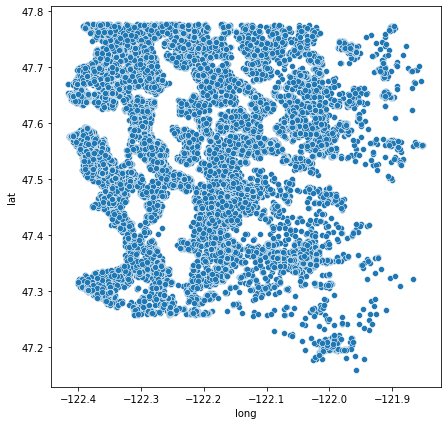

In [12]:
plt.figure(figsize = (7,7))
sns.scatterplot(df['long'], df['lat'])

In [13]:
from sklearn.cluster import KMeans

# AgglomerativeClustering was also attempted but abandoned because significantly slower

# creates clusters using k-means clustering algorithm.
kmeans = KMeans(500)
clusters = kmeans.fit_predict(df[['lat','long']])
df['geo_cluster_k'] = kmeans.predict(df[['lat','long']])

In [14]:
df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,price,yr_built_bin,renovation_cat,basement_size,geo_cluster_k
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,98178,47.5112,-122.257,1340,5650,221900,post_war,not relevant,none,260
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,98125,47.7210,-122.319,1690,7639,538000,post_war,distant,medium,342
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,98028,47.7379,-122.233,2720,8062,180000,pre_war,not relevant,none,77
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,98136,47.5208,-122.393,1360,5000,604000,post_war,not relevant,large,120
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,98074,47.6168,-122.045,1800,7503,510000,post_80,not relevant,none,407


C:\Users\arnet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='long', ylabel='lat'>

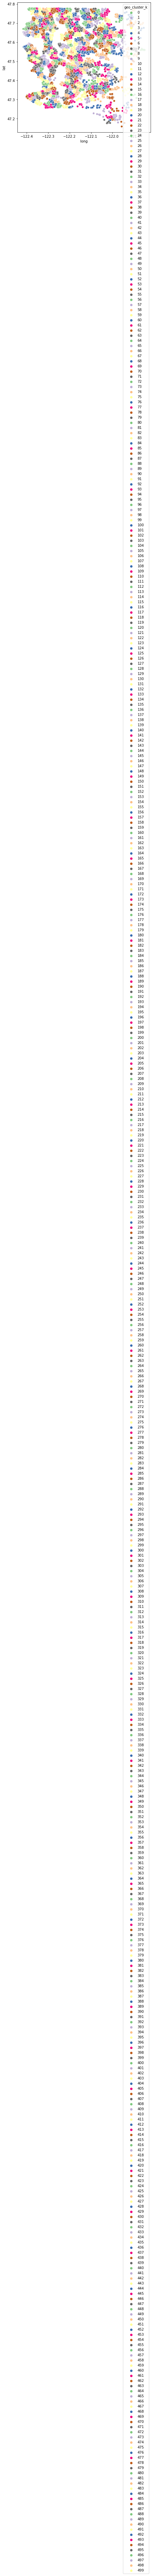

In [15]:
# Plot clusters
plt.figure(figsize = (7,7))
sns.scatterplot(df['long'], df['lat'], df['geo_cluster_k'], palette='Accent')

## Split columns into numerical and categorical values

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20907 entries, 0 to 20906
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              20907 non-null  int64         
 1   date            20907 non-null  datetime64[ns]
 2   bedrooms        20907 non-null  int64         
 3   bathrooms       20907 non-null  float64       
 4   sqft_living     20907 non-null  int64         
 5   sqft_lot        20907 non-null  int64         
 6   floors          20907 non-null  float64       
 7   waterfront      20907 non-null  int64         
 8   view            20907 non-null  int64         
 9   condition       20907 non-null  int64         
 10  grade           20907 non-null  int64         
 11  sqft_above      20907 non-null  int64         
 12  sqft_basement   20907 non-null  int64         
 13  yr_built        20907 non-null  int64         
 14  yr_renovated    20907 non-null  int64         
 15  zi

### Drop columns which are not used for regression

In [17]:
df_waterfront = df['waterfront']
df_trimmed = df.drop(['id', 'date', 'lat', 'long', 'waterfront', 'sqft_living', 'sqft_lot', 'sqft_basement', 'yr_renovated', 'yr_built', 'zipcode'], axis= 1)

In [18]:
df_trimmed.head()

,bedrooms,bathrooms,floors,view,condition,grade,sqft_above,sqft_living15,sqft_lot15,price,yr_built_bin,renovation_cat,basement_size,geo_cluster_k
0,3,1.00,1.0,0,3,7,1180,1340,5650,221900,post_war,not relevant,none,260
1,3,2.25,2.0,0,3,7,2170,1690,7639,538000,post_war,distant,medium,342
2,2,1.00,1.0,0,3,6,770,2720,8062,180000,pre_war,not relevant,none,77
3,4,3.00,1.0,0,5,7,1050,1360,5000,604000,post_war,not relevant,large,120
4,3,2.00,1.0,0,3,8,1680,1800,7503,510000,post_80,not relevant,none,407


### Select categorical data

Based on research, ordinal data such as condition, grade and view can be treated either as numerical or as categorical data. Both approaches were tested, but it was found that treating these elements as categorical data yielded a better result

In [19]:
# Convert columns with ordinal / categorical data to object type
df_new = df_trimmed.copy()
columns = ['view', 'condition', 'grade', 'geo_cluster_k']
for column in columns:
    df_new[column] = df_new[column].astype('object')
    
# NO MORE COLUMNS OR ROWS WILL BE DROPPED FROM THIS POINT ON

In [20]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20907 entries, 0 to 20906
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bedrooms        20907 non-null  int64  
 1   bathrooms       20907 non-null  float64
 2   floors          20907 non-null  float64
 3   view            20907 non-null  object 
 4   condition       20907 non-null  object 
 5   grade           20907 non-null  object 
 6   sqft_above      20907 non-null  int64  
 7   sqft_living15   20907 non-null  int64  
 8   sqft_lot15      20907 non-null  int64  
 9   price           20907 non-null  int64  
 10  yr_built_bin    20907 non-null  object 
 11  renovation_cat  20907 non-null  object 
 12  basement_size   20907 non-null  object 
 13  geo_cluster_k   20907 non-null  object 
dtypes: float64(2), int64(5), object(7)
memory usage: 2.2+ MB


In [21]:
cat = df_new.select_dtypes(include = 'object')
cat

,view,condition,grade,yr_built_bin,renovation_cat,basement_size,geo_cluster_k
0,0,3,7,post_war,not relevant,none,260
1,0,3,7,post_war,distant,medium,342
2,0,3,6,pre_war,not relevant,none,77
3,0,5,7,post_war,not relevant,large,120
4,0,3,8,post_80,not relevant,none,407
...,...,...,...,...,...,...,...
20902,0,3,8,post_2000,not relevant,none,299
20903,0,3,8,new,not relevant,none,3
20904,0,3,7,post_2000,not relevant,none,124
20905,0,3,8,post_2000,not relevant,none,34


In [22]:
# Convert to binary
categorical = pd.get_dummies(cat, 
               drop_first = True)

## Numerical data

### Correlations check

<AxesSubplot:>

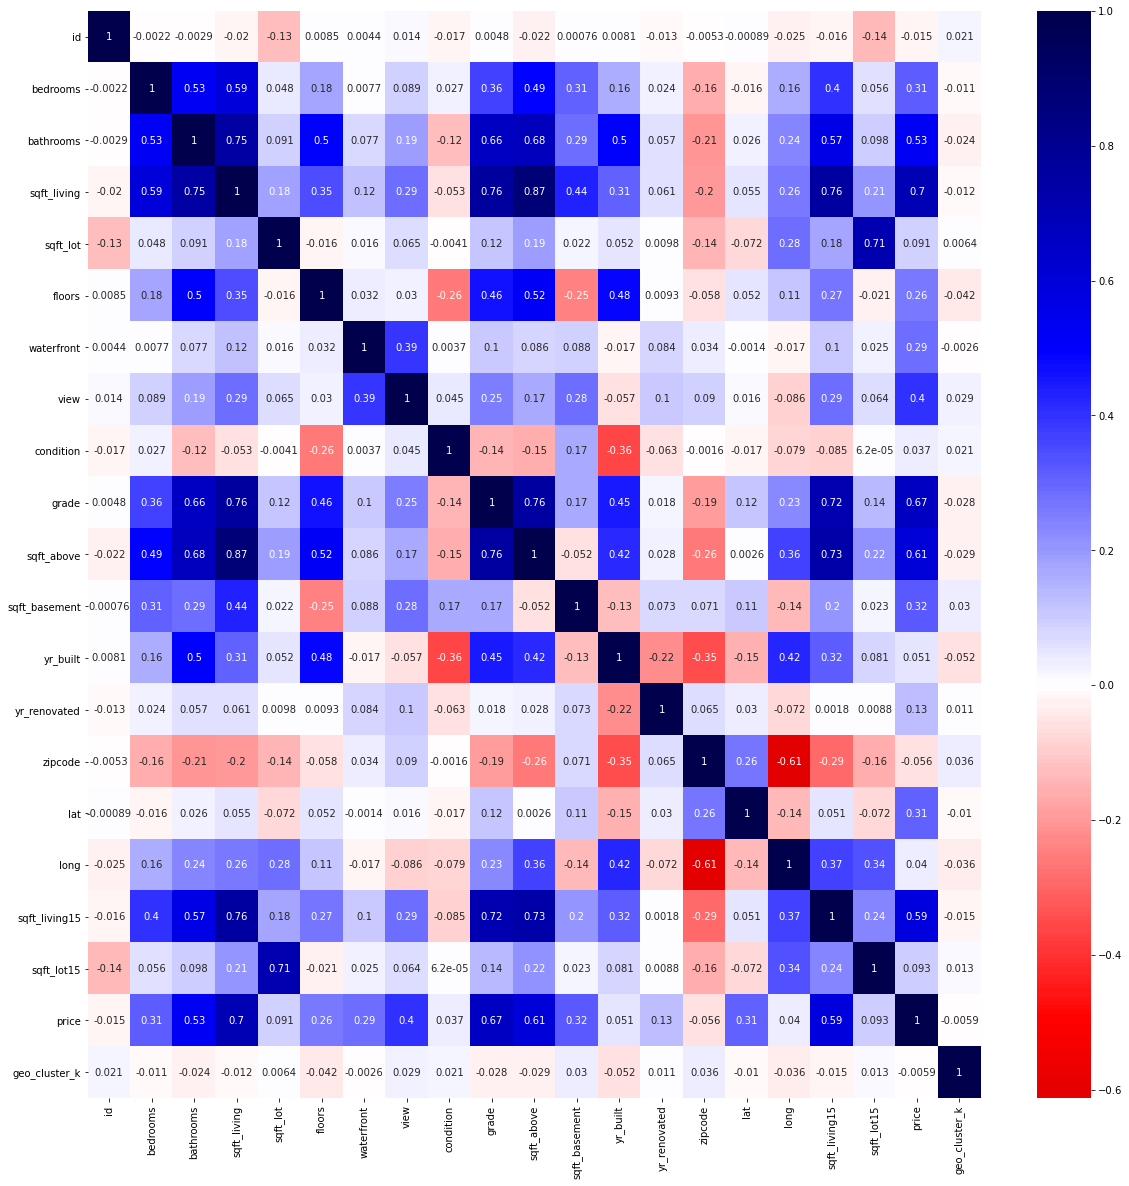

In [23]:
# Plot regular df correlations matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize= (20, 20))
sns.heatmap(corr_matrix, 
            cmap='seismic_r', #add '_r' at the end to reverse color scheme
            center = 0,
            annot= True)

<AxesSubplot:>

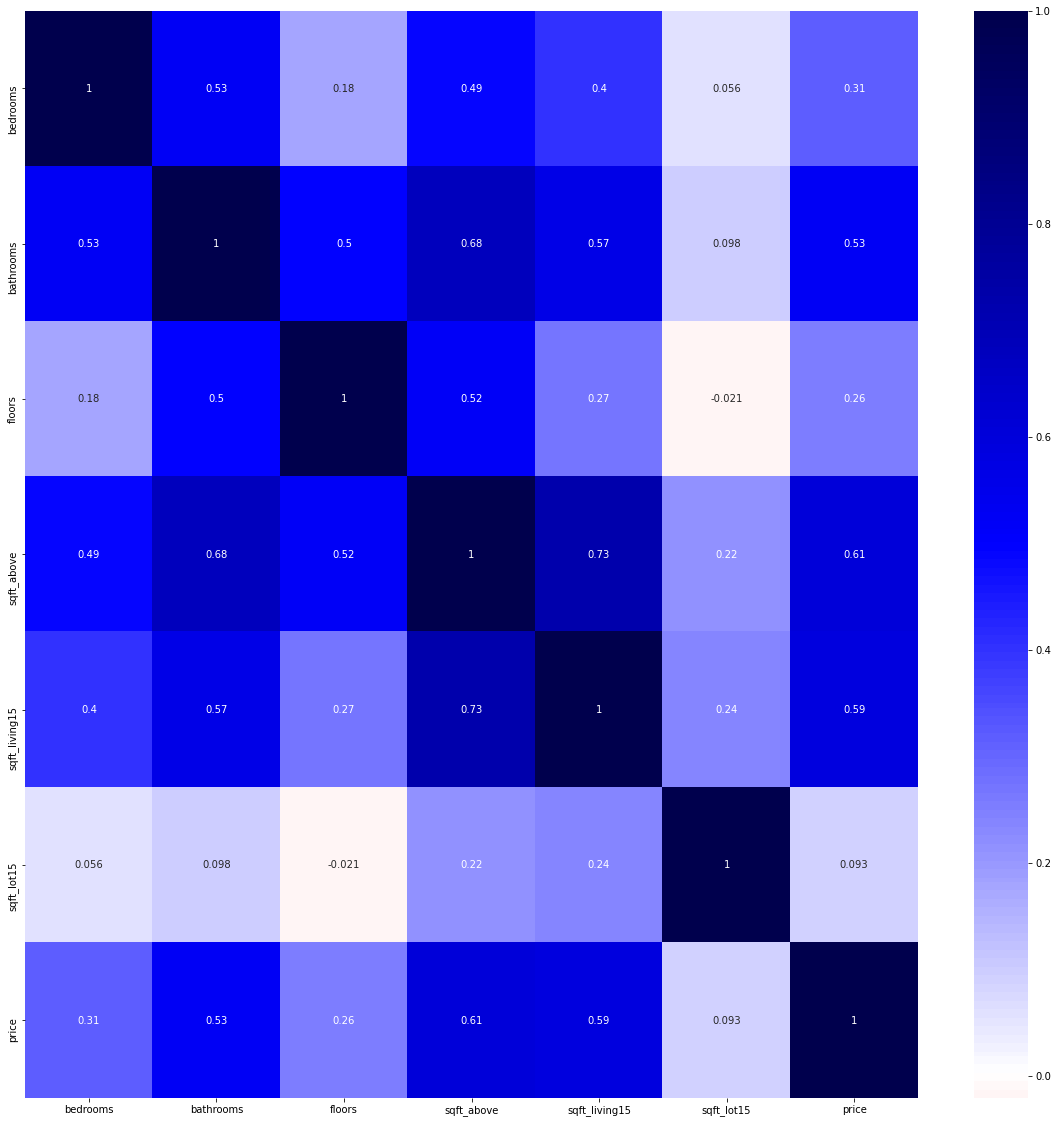

In [24]:
# Check correlations of only numericals
corr_matrix = df_new.corr()

# Plot correlations matrix for GENERAL PROPERTY MARKET using heatmap
fig, ax = plt.subplots(figsize= (20, 20))
sns.heatmap(corr_matrix, 
            cmap='seismic_r', #add '_r' at the end to reverse color scheme
            center = 0,
            annot= True)

#### General observations
A number of variables seem to be correlated to price including in particular:
* sq. ft living15
* sq. ft above

Note: initial correlation tests resulted in the dropping of sq. ft living and sq. ft lot further up.

### Compare correlations in higher and lower price segments

In [25]:
# Create seperate df for higher priced and lower priced properties
higher_priced = df_trimmed[df_trimmed["price"] > 650000]
lower_priced = df_trimmed[df_trimmed["price"] < 650000]

In [26]:
# Create correlations matrices
corr_matrix_hp = higher_priced.corr()
corr_matrix_lp = lower_priced.corr()

<AxesSubplot:>

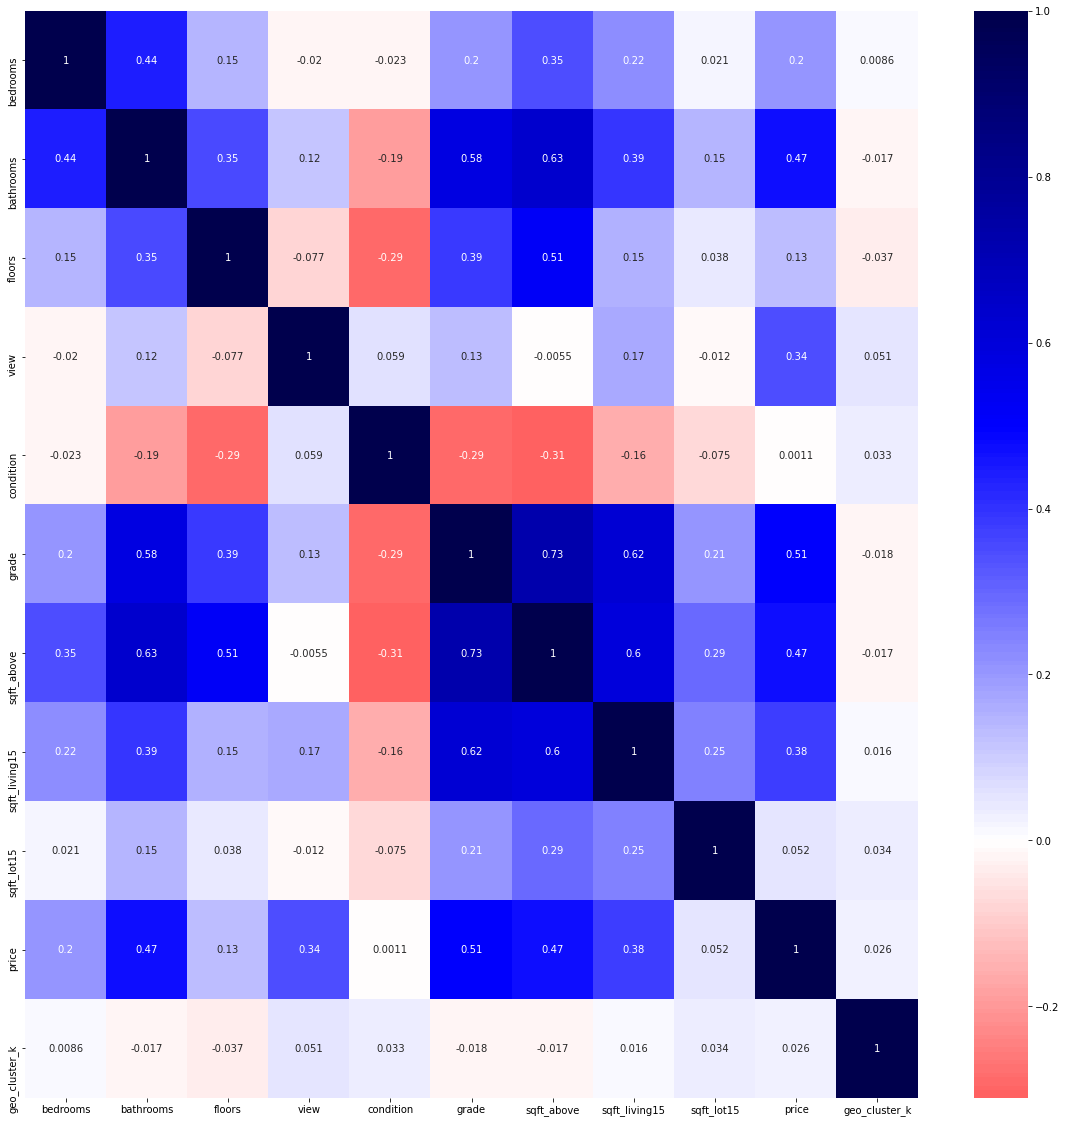

In [27]:
# Plot correlations matrix for HIGHER-PRICED segment
fig, ax = plt.subplots(figsize= (20, 20))
sns.heatmap(corr_matrix_hp, 
            cmap='seismic_r',
            center = 0,
            annot= True)

<AxesSubplot:>

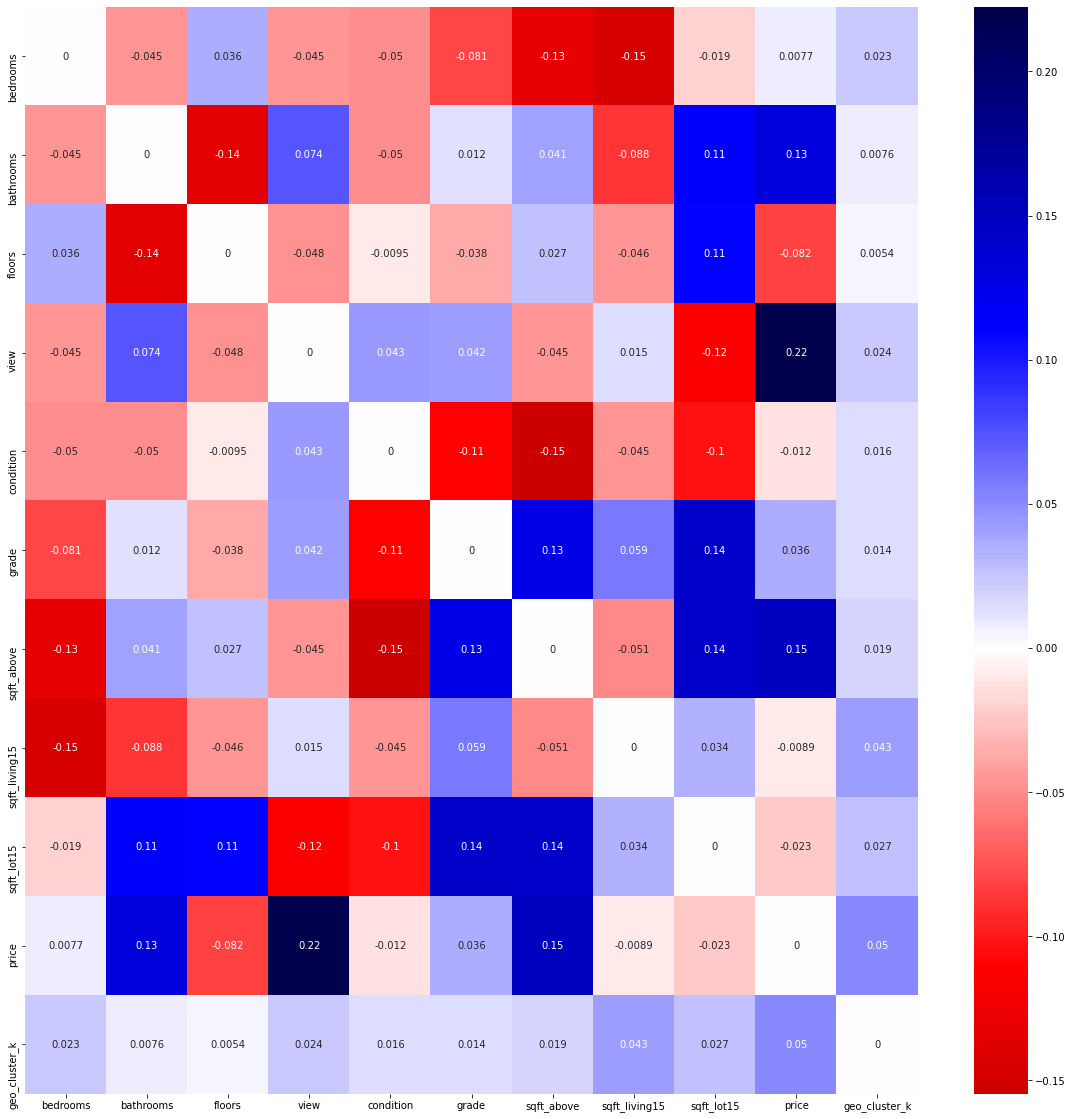

In [28]:
# View difference in correlation HIGH-PRICED VS. LOW-PRICED
#Each number indicates that the correlation in the high-priced property market is higher 
#(or lower if negative) than in the high-priced market by that number
fig, ax = plt.subplots(figsize= (20, 20))
sns.heatmap((corr_matrix_hp-corr_matrix_lp), 
            cmap='seismic_r',
            center = 0,
            annot= True)

#### Observations regarding higher vs. lower price segment
* When compared to the lower price segment, Sq. Ft. living, Sq. Ft. above and number of bathrooms seem to be more highly correlated to price

#### Seperate and drop value to be predicted

In [29]:
# Seperate and drop value to be predicted
y = df_new['price']
df_new.drop(['price'], axis= 1, inplace = True)
df_new

,bedrooms,bathrooms,floors,view,condition,grade,sqft_above,sqft_living15,sqft_lot15,yr_built_bin,renovation_cat,basement_size,geo_cluster_k
0,3,1.00,1.0,0,3,7,1180,1340,5650,post_war,not relevant,none,260
1,3,2.25,2.0,0,3,7,2170,1690,7639,post_war,distant,medium,342
2,2,1.00,1.0,0,3,6,770,2720,8062,pre_war,not relevant,none,77
3,4,3.00,1.0,0,5,7,1050,1360,5000,post_war,not relevant,large,120
4,3,2.00,1.0,0,3,8,1680,1800,7503,post_80,not relevant,none,407
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20902,3,2.50,3.0,0,3,8,1530,1530,1509,post_2000,not relevant,none,299
20903,4,2.50,2.0,0,3,8,2310,1830,7200,new,not relevant,none,3
20904,2,0.75,2.0,0,3,7,1020,1020,2007,post_2000,not relevant,none,124
20905,3,2.50,2.0,0,3,8,1600,1410,1287,post_2000,not relevant,none,34


### Get numerical values

In [30]:
# Get numericals for Model 1
numerical = df_new.select_dtypes(include = np.number)
numerical

,bedrooms,bathrooms,floors,sqft_above,sqft_living15,sqft_lot15
0,3,1.00,1.0,1180,1340,5650
1,3,2.25,2.0,2170,1690,7639
2,2,1.00,1.0,770,2720,8062
3,4,3.00,1.0,1050,1360,5000
4,3,2.00,1.0,1680,1800,7503
...,...,...,...,...,...,...
20902,3,2.50,3.0,1530,1530,1509
20903,4,2.50,2.0,2310,1830,7200
20904,2,0.75,2.0,1020,1020,2007
20905,3,2.50,2.0,1600,1410,1287


### Check for normal distribution

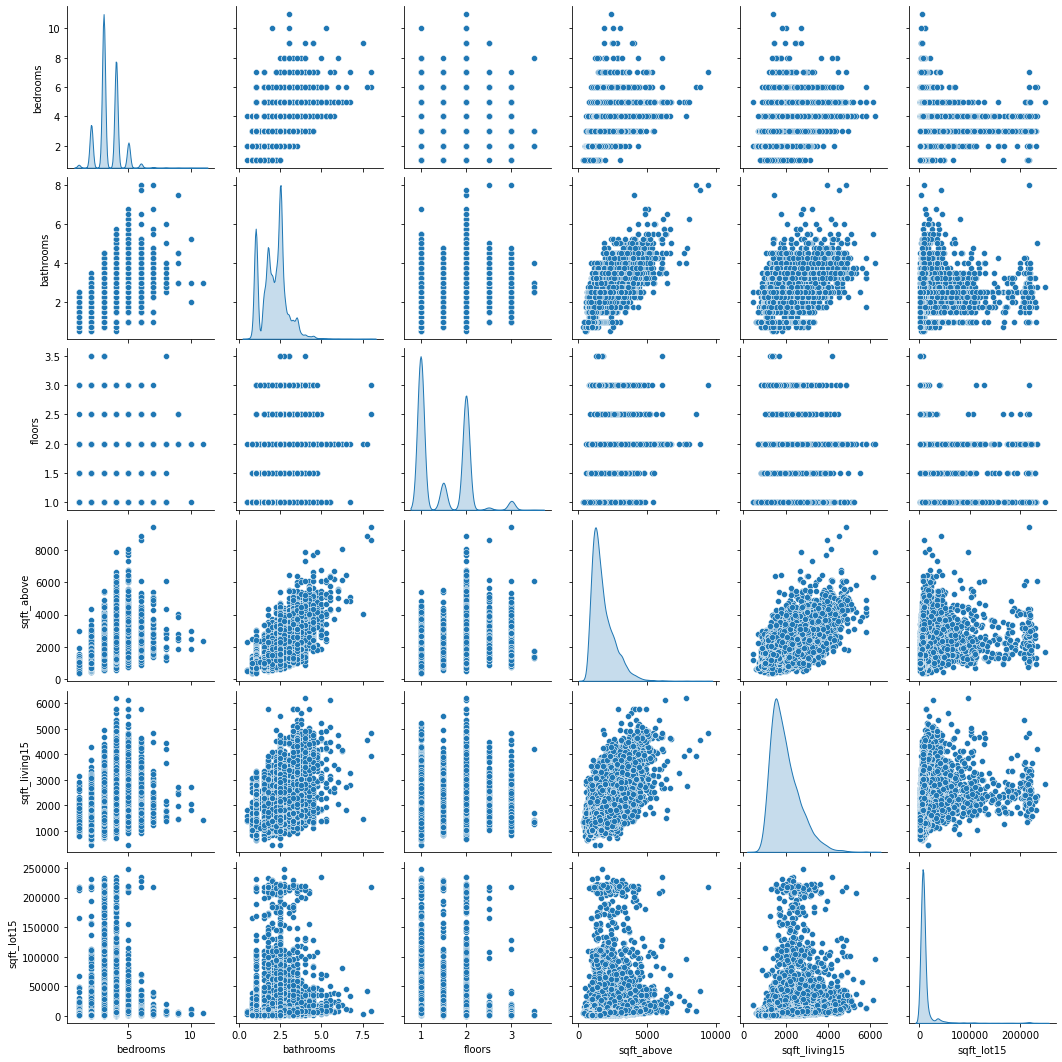

In [31]:
# Plot data
sns.pairplot(numerical, diag_kind='kde')

### Normalise data with normaliser

Several scaling methods were tested but it was decided to move forward with Normalizer and Robust Scaler due to the favorable performance in initial tests.

In [32]:
from sklearn.preprocessing import Normalizer

# Model 1 - Normalise
transformer_n =  Normalizer().fit(numerical)
X_normalized = transformer_n.transform(numerical)

In [33]:
X_normalized

array([[5.06293882e-04, 1.68764627e-04, 1.68764627e-04, 1.99142260e-01,
        2.26144601e-01, 9.53520145e-01],
       [3.69500332e-04, 2.77125249e-04, 2.46333554e-04, 2.67271907e-01,
        2.08151854e-01, 9.40871011e-01],
       [2.34102900e-04, 1.17051450e-04, 1.17051450e-04, 9.01296163e-02,
        3.18379943e-01, 9.43668788e-01],
       ...,
       [8.09189048e-04, 3.03445893e-04, 8.09189048e-04, 4.12686414e-01,
        4.12686414e-01, 8.12021210e-01],
       [1.20439314e-03, 1.00366095e-03, 8.02928757e-04, 6.42343006e-01,
        5.66064774e-01, 5.16684655e-01],
       [1.00986179e-03, 3.78698172e-04, 1.00986179e-03, 5.15029514e-01,
        5.15029514e-01, 6.85191226e-01]])

In [34]:
# Convert normalised data to dataframes
#columns_m1 = numerical_m1.columns.to_list()
#X_norm_m1 = pd.DataFrame(X_normalized_m1, columns=columns_m1)

columns_n = numerical.columns.to_list()
X_norm = pd.DataFrame(X_normalized, columns=columns_n)

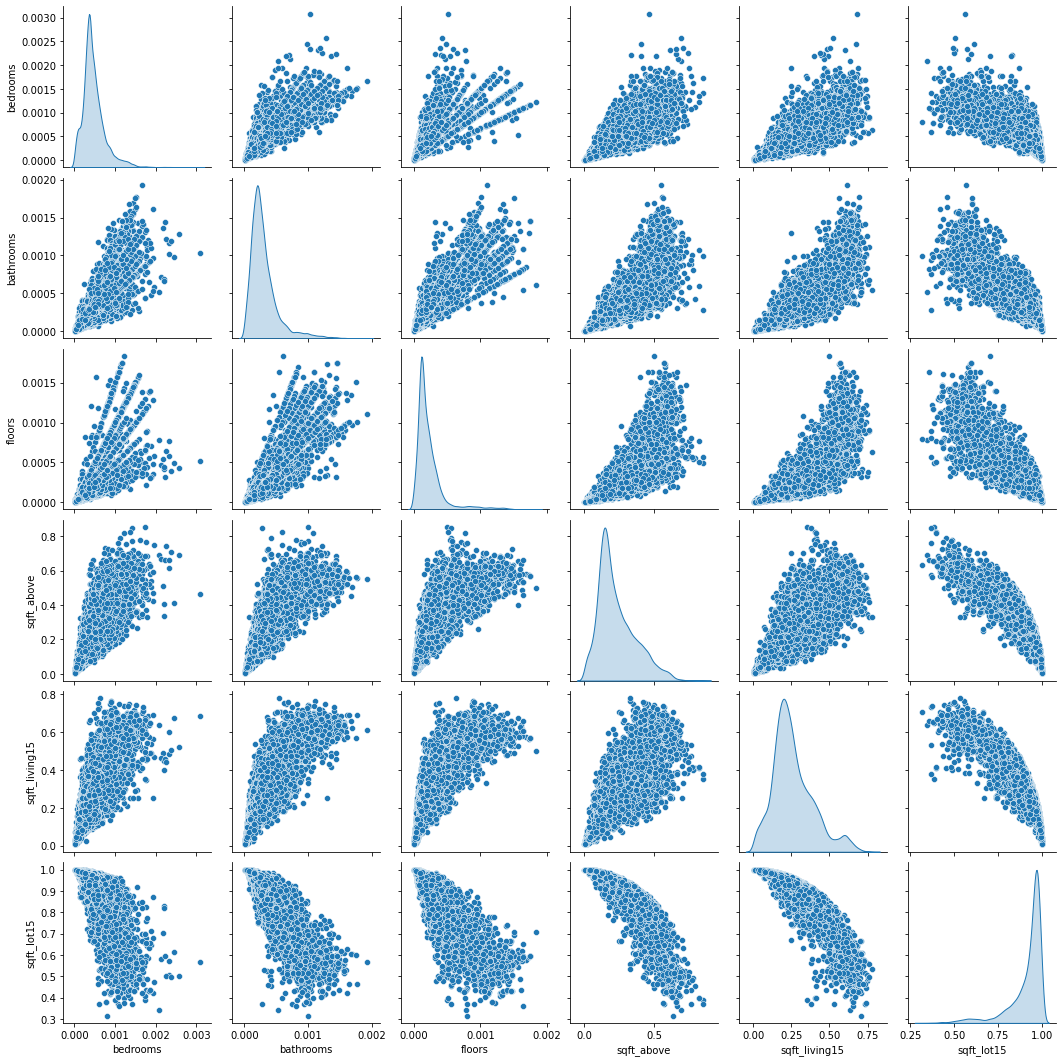

In [35]:
# Plot normalised data
sns.pairplot(X_norm, diag_kind='kde')

### Scale data with Robust Scaler

In [36]:
from sklearn.preprocessing import RobustScaler

# Model 2 - Robust Scale
transformer_s =  RobustScaler().fit(numerical)
X_rob_scaled = transformer_s.transform(numerical)

In [37]:
X_rob_scaled

array([[ 0.        , -1.25      ,  0.        , -0.37      , -0.56321839,
        -0.39634146],
       [ 0.        ,  0.        ,  1.        ,  0.62      , -0.16091954,
         0.00792683],
       [-1.        , -1.25      ,  0.        , -0.78      ,  1.02298851,
         0.09390244],
       ...,
       [-1.        , -1.5       ,  1.        , -0.53      , -0.93103448,
        -1.13678862],
       [ 0.        ,  0.25      ,  1.        ,  0.05      , -0.48275862,
        -1.28313008],
       [-1.        , -1.5       ,  1.        , -0.53      , -0.93103448,
        -1.26890244]])

In [38]:
# Convert scaled data to dataframe
X_r_scaled = pd.DataFrame(X_rob_scaled, columns=columns_n)

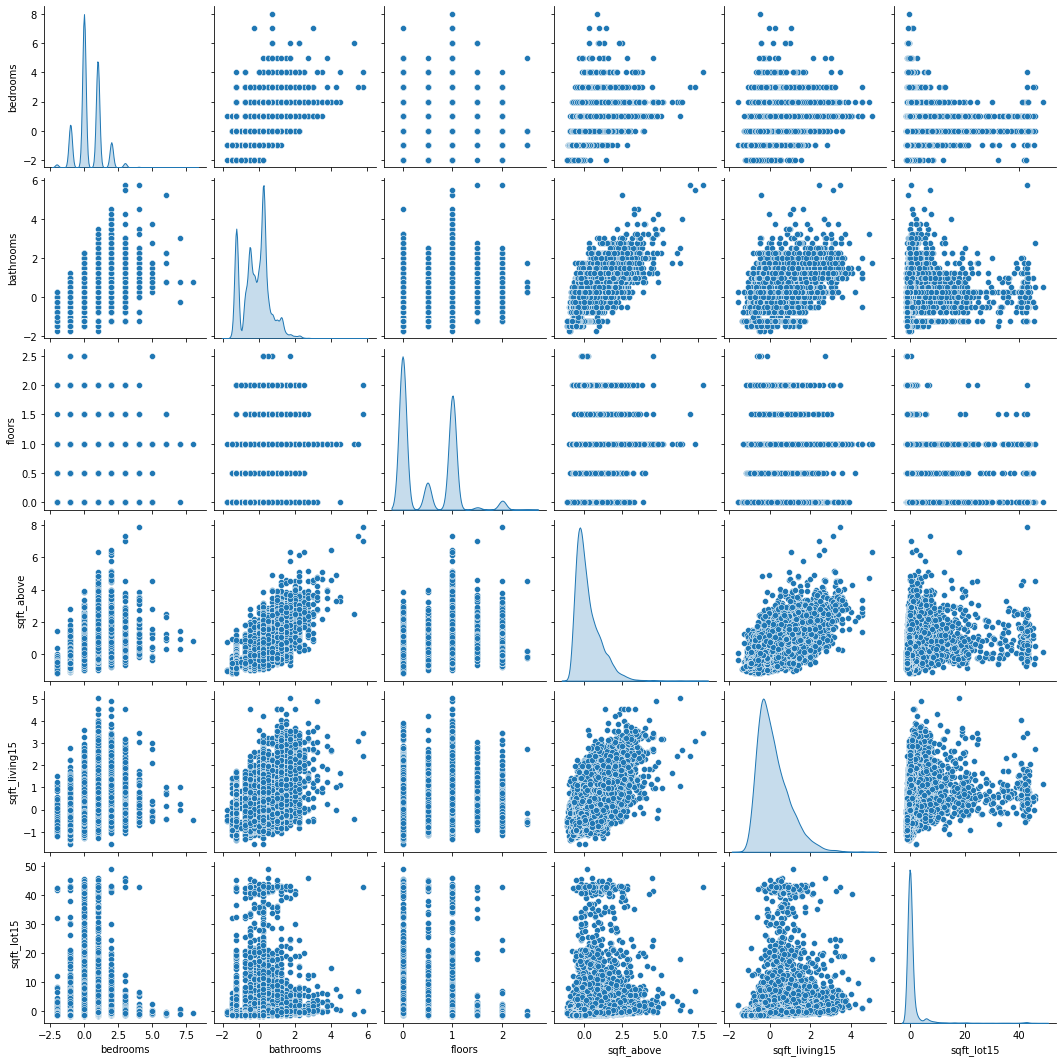

In [39]:
# Plot scaled data
sns.pairplot(X_r_scaled, diag_kind='kde')

## Rejoin numerical and categorical values

In [40]:
# Convert series to 2-dimensional dataframe
df_wf = pd.DataFrame(df_waterfront)

In [41]:
# Check length of dfs to be concatenated
shapes = [X_norm, X_r_scaled, categorical, df_wf]
for x in shapes:
    print(x.shape)

(20907, 6)
(20907, 6)
(20907, 527)
(20907, 1)


In [42]:
# Model 1 - Normalised
X_m1 = np.concatenate((X_norm, categorical, df_wf), axis=1)

# Model 2 - Robust Scaled
X_m2 = np.concatenate((X_r_scaled, categorical, df_wf), axis=1)

## Run regression

In [43]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

In [44]:
y

0        221900
1        538000
2        180000
3        604000
4        510000
          ...  
20902    360000
20903    400000
20904    402101
20905    400000
20906    325000
Name: price, Length: 20907, dtype: int64

In [45]:
# Model 1 - Normalised
X_train_m1, X_test_m1, y_train_m1, y_test_m1 = train_test_split(X_m1, y, test_size= 0.4, random_state=100) 

# Model 2 - Robust Scaled
X_train_m2, X_test_m2, y_train_m2, y_test_m2 = train_test_split(X_m2, y, test_size= 0.4, random_state=100) 

In [53]:
# Results from normalised model
lm_m1 = linear_model.LinearRegression() # configure model
model_m1= lm_m1.fit(X_train_m1, y_train_m1) # train model
predictions = lm_m1.predict(X_test_m1) # set up prediction method
print("r2 score:",r2_score(y_test_m1, predictions)) # calculate my accuracy
print("MSE:",mean_squared_error(y_test_m1,predictions))
print("MAE:",mean_absolute_error(y_test_m1,predictions))

r2 score: 0.8356998647552931
MSE: 22901354018.785374
MAE: 87464.2577979112


In [47]:
# Results from Robust Scaling model where lot sizes over 200,000 squ. feet are excluded
lm_m2 = linear_model.LinearRegression() # configure model
model_m2= lm_m2.fit(X_train_m2, y_train_m2) # train model
predictions = lm_m2.predict(X_test_m2) # set up prediction method
print("r2 score:",r2_score(y_test_m2, predictions)) # calculate my accuracy
print("MSE:",mean_squared_error(y_test_m2,predictions))
print("MAE:",mean_absolute_error(y_test_m2,predictions))

r2 score: 0.8547802585816529
MSE: 20241789233.98166
MAE: 83201.22538602666


## Run K-nearest Neighbour

In [59]:
from sklearn.neighbors import KNeighborsRegressor

In [60]:
knn = KNeighborsRegressor(n_neighbors=4)

In [61]:
#Train the model using the training sets
knn.fit(X_train_m1, y_train_m1)

KNeighborsRegressor(n_neighbors=4)

In [62]:
#Predict the response for test dataset
y_pred = knn.predict(X_test_m1)

In [63]:
# Model Accuracy, how often is the classifier correct?
print("r2 score:",r2_score(y_test_m1, y_pred))
print("MSE:",mean_squared_error(y_test_m1,predictions))
print("MAE:",mean_absolute_error(y_test_m1,predictions))

r2 score: 0.6896527512085158
MSE: 22901354018.785374
MAE: 87464.2577979112
